In [583]:
library('glue')

# Práctica 2

## Ejercicio 1

De un lote que contiene 15 artículos, de los cuales 4 son defectuosos, se eligen 3 artículos al azar con reposición. Si llamamos $X$ al número de artículos defectuosos entre los seleccionados:

### Pregunta A

Hallar la función de probabilidad puntual asociada a $X$ y graficarla usando R.

Sea $S = \{ (p_1, p_2, p_3) \mid p_i \in \{D_1, \dots, D_4, F_1, \dots, F_{11}\} \}$ el espacio muestral de elegir 3 artículos con reposición de un total de 15 artículos, con 4 defectuosos ($D_i$) y 11 funcionales ($F_i$).

$\#S = 15^3 = 3375$

Sea $R_X = \{0,1,2,3\}$ el rango de $X$ (el conjunto de posibles valores de la VA discreta $X$).

La probabilidad puntual para un valor de $x \in R_X$ es: $p_X(x) = P(X = x) = P(\{ w \in S \mid X(w) = x \})$

Ahora calculemos $p_X$ para cada $x \in R_X$:

$p_X(0) = P(X = 0) = (\frac{11}{15})^3 \approx 0.394370$

$p_X(1) = P(X = 1) = {3 \choose 1} * \frac{4}{15} * (\frac{11}{15})^2 \approx 0.4302$

$p_X(2) = P(X = 2) = {3 \choose 2} * (\frac{4}{15})^2 * \frac{11}{15} \approx 0.1564$

$p_X(3) = P(X = 3) = (\frac{4}{15})^3 \approx 0.01896$

Para cualquier valor posible $x$ de la VA $X$, $p_X(x)$ se calcula tomando el combinatorio $3 \choose x$ (en cuántas de las 3 elecciones de artículos puede haber un artículo defectuoso), multiplicado por la probabilidad de elegir $x$ artículos defectuosos: $(\frac{4}{15})^x$, y finalmente multiplicado por la probabilidad de elegir $3-x$ artículos funcionales: $(\frac{11}{15})^{3-x}$.

$p_X(x) = {3 \choose x} * (\frac{4}{15})^x * (\frac{11}{15})^{3-x}$

In [584]:
R_X = 0:3
p_X = function(x) choose(3,x) * (4/15)^x * (11/15)^(3-x)
P = sapply(R_X, p_X)

Veamos si coinciden los valores calculados previamente con la fórmula encontrada:

In [585]:
P

[1] 0.39437037 0.43022222 0.15644444 0.01896296

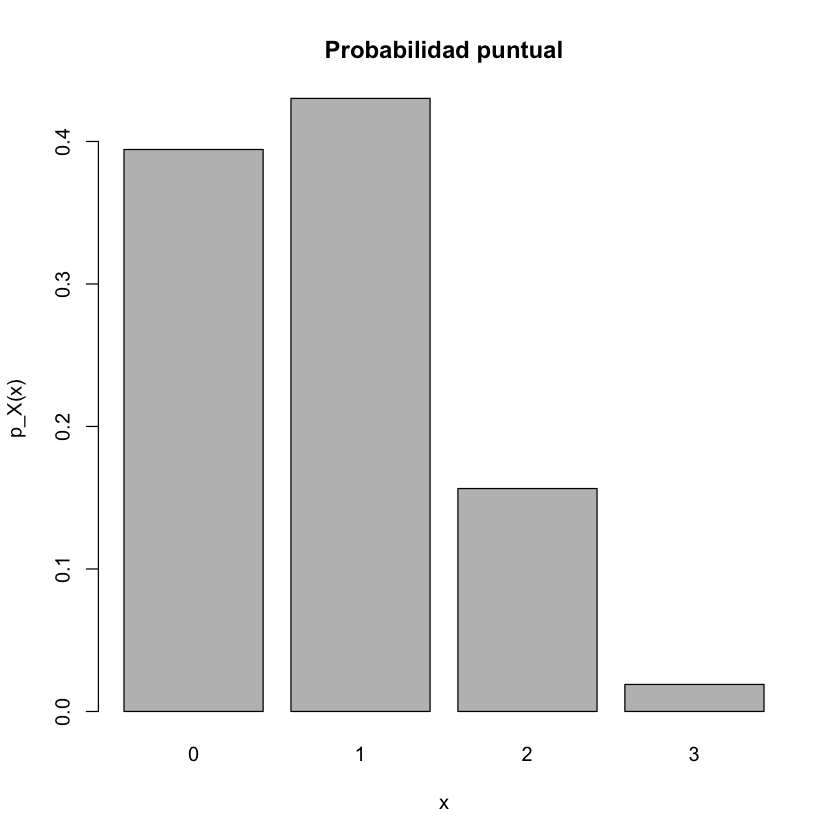

In [586]:
barplot(P, main='Probabilidad puntual', xlab='x', ylab='p_X(x)', names.arg=R_X)

### Pregunta B

¿Cuál es la probabilidad de que al menos 2 artículos sean defectuosos?

$x \geq 2 \rightarrow P(X \geq 2) = p_X(2) + P_X(3)$

In [587]:
p_X(2) + p_X(3)

[1] 0.1754074

Otra forma:

$x \geq 2 \rightarrow P(X \geq 2) = 1 - P(X < 2) = 1 - (p_X(0) + p_X(1))$

In [588]:
1 - (p_X(0) + p_X(1))

[1] 0.1754074

### Pregunta C

Hallar la función de distribución acumulada de $X$ y graficarla usando R.

$F_X(x) = P(X \leq x) = \sum_{y \in R_X, y \leq x} p_X(y)$

In [589]:
F_X = function(x) sum(sapply(R_X[R_X <= x], p_X))

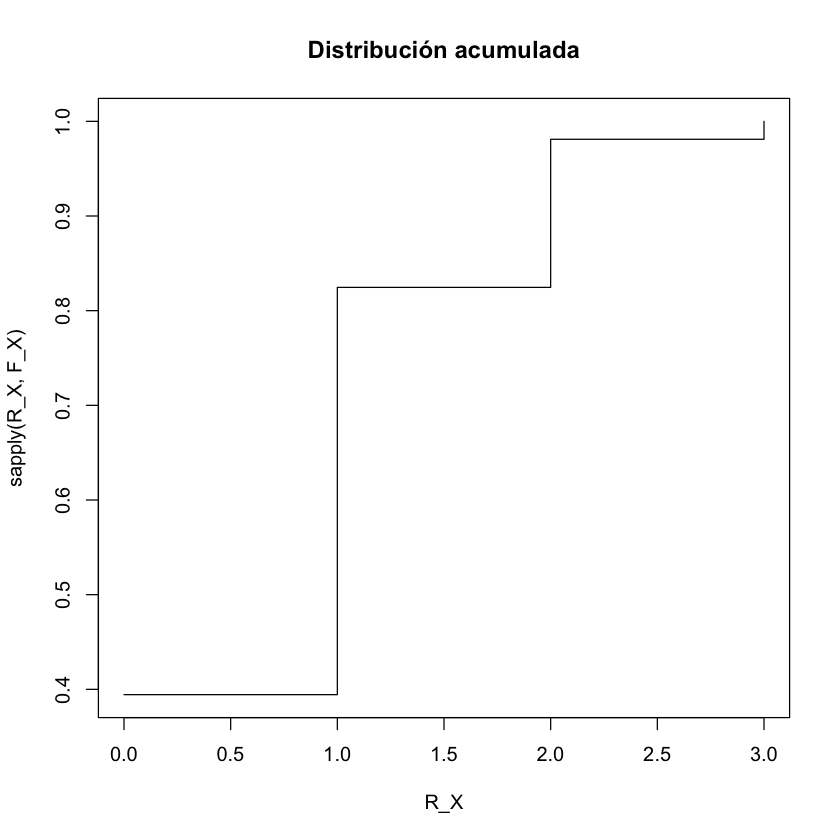

In [590]:
plot(R_X, sapply(R_X, F_X), main='Distribución acumulada', type='s')

### Pregunta D

Estimar mediante una simulación las probabilidades calculadas en el item a).

In [596]:
articulos = c(rep('D', 4), rep('F', 11))
n = 100000

experimento = function(x) {
    seleccionados = sample(articulos, size=3, replace=TRUE)
    return = length(seleccionados[seleccionados == 'D']) == x
}

simular = function(x) {
    resultados = replicate(n, experimento(x))
    p = length(resultados[resultados == TRUE]) / n
    print(glue('p_X({x}) = {p}'))
}

for (x in c(0, 1, 2, 3)) {
    simular(x)
}

p_X(0) = 0.39284
p_X(1) = 0.42982
p_X(2) = 0.15585
p_X(3) = 0.01904


## Ejercicio 2

Sea $X$ una variable aleatoria con función de distribución:

$
F_X(x) =
\begin{cases}
  0 & \text{si } x < 1 \\
  0.3 & \text{si } 1 \leq x < 3 \\
  0.4 & \text{si } 3 \leq x < 6 \\
  0.6 & \text{si } 6 \leq x < 12 \\
  1 & \text{si } 12 \leq x
\end{cases}
$

### Pregunta A

Hallar la función de probabilidad puntual de X.

$P_X(x) = F_X(x) - F_X(x^-)$

Consideramos todos los $x$ donde $F_X$ pega un salto. Esto sucede en las cotas inferiores de los intervalos de partición de $F_X$.

$P_X(1) = F_X(1) - F_X(1^-) = 0.3 - 0 = 0.3$

$P_X(3) = F_X(3) - F_X(3^-) = 0.4 - 0.3 = 0.1$

$P_X(6) = F_X(6) - F_X(6^-) = 0.6 - 0.4 = 0.2$

$P_X(12) = F_X(12) - F_X(12^-) = 1 - 0.6 = 0.4$

Con esta información podemos definir $P_X$ de la siguiente forma:

$
P_X(x) =
\begin{cases}
  0.3 & \text{si } x = 1 \\
  0.1 & \text{si } x = 3 \\
  0.2 & \text{si } x = 6 \\
  0.4 & \text{si } x = 12
\end{cases}
$

### Pregunta B

Calcular de dos maneras las siguientes probabilidades:

**Utilizando la función de distribución**

$P(3 < X \leq 6) = F_X(6) - F_X(3) = 0.6 - 0.4 = 0.2$

$P(3 \leq X \leq 6) = F_X(6) - F_X(3^-) = 0.6 - 0.3 = 0.3$

$P(X \geq 4) = 1 - F_X(4^-) = 1 - 0.4 = 0.6$

$P(X \geq 6) = 1 - F_X(6^-) = 1 - 0.4 = 0.6$

**Utilizando la función de probabilidad puntual**

$P(3 < X \leq 6) = P_X(6) = 0.2 = 0.2$

$P(3 \leq X \leq 6) = P_X(3) + P_X(6) = 0.1 + 0.2 = 0.3$

$P(X \geq 4) = P_X(6) + P_X(12) = 0.2 + 0.4 = 0.6$

$P(X \geq 6) = P_X(6) + P_X(12) = 0.2 + 0.4 = 0.6$

### Pregunta C

Utilizando el comando `sample`, generar 5 realizaciones de esta variable aleatoria en R.

El chiste acá es usar el parámetro `prob` del comando `sample` para pasarle un vector de probabilidades asociadas a cada valor de $x$.

In [592]:
R_X = c(1, 3, 6, 12)
P_X = c(0.3, 0.1, 0.2, 0.4)
n = 5
sample(R_X, n, replace=TRUE, prob=P_X)

[1] 12  6  6  3 12

### Pregunta D

Mediante una simulación, estimar las probabilidades del item b).

In [593]:
R_X = c(1, 3, 6, 12)
P_X = c(0.3, 0.1, 0.2, 0.4)
n = 100000

simular = function(condición) {
    resultados = sample(R_X, n, replace=TRUE, prob=P_X)
    p = length(Filter(condición, resultados)) / n
    print(glue('P({match.call()[2]}) = {p}'))
}
                 
simular(function(X) 3 < X & X <= 6)
simular(function(X) 3 <= X & X <= 6)
simular(function(X) X >= 4)
simular(function(X) X >= 6)

P(function(X) 3 < X & X <= 6) = 0.20094
P(function(X) 3 <= X & X <= 6) = 0.29962
P(function(X) X >= 4) = 0.60156
P(function(X) X >= 6) = 0.59951


## Ejercicio 3

Definir una función en R que, dados dos vectores $x = (x_1, \dots, x_n)$ y $p = (p_1, \dots, p_n)$ y un número real $t$, calcule $F_X(t)$, es decir, la probabilidad de que de la variable aleatoria discreta que toma valores $x_1, \dots, x_n$ con probabilidades $p_1, \dots, p_n$ respectivamente, sea menor o igual que $t$. Probarla con la variable aleatoria del ejercicio 2.

In [594]:
construir_F_X = function(R_X, P_X) {
    return = function(t) sum(P_X[R_X <= t])
}

R_X = c(1, 3, 6, 12)
P_X = c(0.3, 0.1, 0.2, 0.4)

F_X = construir_F_X(R_X, P_X)

for (t in c(0, 1, 3, 6, 12)) {
    print(glue('F_X({t}) = {F_X(t)}'))
}

F_X(0) = 0
F_X(1) = 0.3
F_X(3) = 0.4
F_X(6) = 0.6
F_X(12) = 1
